In [1]:
import uproot
import time
import matplotlib.pyplot as plt
import yaml
import seaborn as sns
import pandas as pd
import awkward as ak
import numpy as np
import vector

In [2]:
conf = yaml.load(open('/home/matheus/pessoal/notebooks_aleatorios/fbs/config.yml'), Loader=yaml.FullLoader)

In [3]:
file = uproot.open(conf['root_url'])
tree = file['Events;1']

In [4]:
nMuon = tree['nMuon'].array()
muon_pt = tree['Muon_pt'].array()
muon_eta = tree['Muon_eta'].array()
muon_mass = tree['Muon_mass'].array()

In [12]:
muon_phi = tree['Muon_phi'].array()

In [13]:
print(f'len do nMuon: {len(nMuon)}')
print(f'len do muon_pt: {len(muon_pt)}')
print(f'len do muon_eta: {len(muon_eta)}')
print(f'len do muon_phi: {len(muon_phi)}')

len do nMuon: 1933726
len do muon_pt: 1933726
len do muon_eta: 1933726
len do muon_phi: 1933726


In [6]:
def tratamento_any(vector):
    return ak.to_numpy(ak.fill_none(ak.pad_none(vector, np.max(ak.num(vector))), np.nan))

fazendo filtro para 2 n muons

In [25]:
mask = nMuon==1

In [26]:
muon_pt[mask]

<Array [[16], [20.9], [3.81], ..., [3.2], [3.86]] type='417820 * var * float32'>

In [27]:
muon_p4 = vector.zip({
    "pt": muon_pt[mask],
    "eta": muon_eta[mask],
    "phi": muon_phi[mask],
    "mass": muon_mass[mask],
})

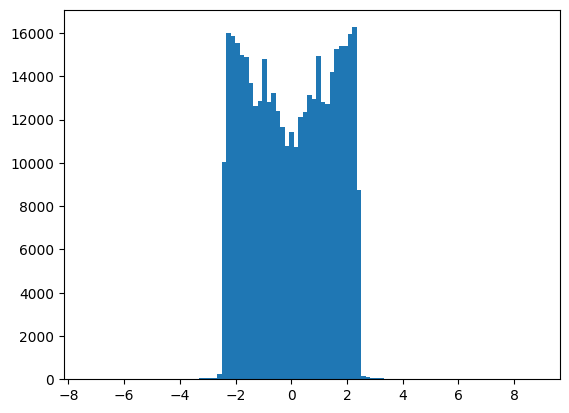

In [28]:
plt.hist(ak.flatten(muon_p4['eta']), bins=100)
plt.show()